In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True
IPythonConsole.molSize = 300,300

sns.set_context("talk")
mpl.rcParams['font.sans-serif'] = ["muli"]

%matplotlib inline

In [3]:
df = pd.read_csv("viscosities/viscosity-stats.csv", index_col=0)
df

,smiles,max,min,median,mean,std,n
0,CCCCCC,0.000360,0.000277,0.000295,0.000298,0.000014,59
1,C1CCCCC1,0.000904,0.000793,0.000829,0.000853,0.000038,75
2,CCCCCCCCCC,0.000861,0.000784,0.000845,0.000829,0.000029,40
3,CCCCCCCCCCCCCCCC,0.003094,0.002706,0.002720,0.002862,0.000164,27
4,C1COCO1,0.054870,0.000531,0.000588,0.010323,0.020835,39
...,...,...,...,...,...,...,...
835,CCCCCCCCn1cc[n+](C)c1.O=[N+]([O-])[O-],0.664100,0.466000,0.565050,0.565050,0.099050,2
836,CCC(O)CC,0.004625,0.004625,0.004625,0.004625,0.000000,2
837,CCCOC=O,0.000477,0.000477,0.000477,0.000477,0.000000,5
838,CCCCn1cc[n+](C)c1.[I-],0.593680,0.442640,0.518160,0.518160,0.075520,2


In [7]:
subset = df[~np.array(["." in x for x in df.smiles.values])]
subset

,smiles,max,min,median,mean,std,n
0,CCCCCC,0.000360,0.000277,0.000295,0.000298,0.000014,59
1,C1CCCCC1,0.000904,0.000793,0.000829,0.000853,0.000038,75
2,CCCCCCCCCC,0.000861,0.000784,0.000845,0.000829,0.000029,40
3,CCCCCCCCCCCCCCCC,0.003094,0.002706,0.002720,0.002862,0.000164,27
4,C1COCO1,0.054870,0.000531,0.000588,0.010323,0.020835,39
...,...,...,...,...,...,...,...
815,CCOC(=O)CC#N,0.002186,0.002186,0.002186,0.002186,0.000000,2
822,ClCC(Cl)Cl,0.001105,0.001019,0.001019,0.001048,0.000040,3
832,CC(C)Cc1ccccc1,0.000905,0.000905,0.000905,0.000905,0.000000,4
836,CCC(O)CC,0.004625,0.004625,0.004625,0.004625,0.000000,2


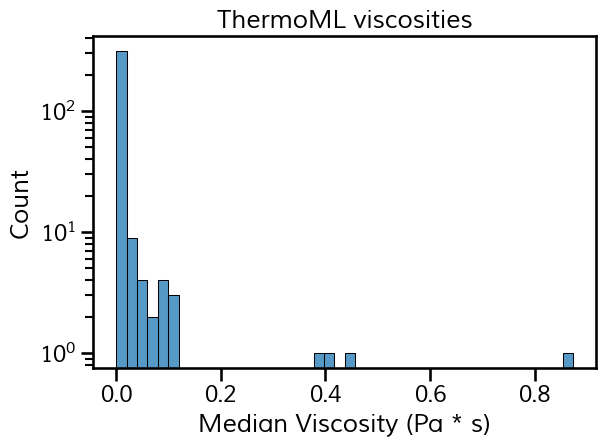

In [21]:
ax = sns.histplot(data=subset, x="median", binwidth=0.02)
ax.set_xlabel("Median Viscosity (Pa * s)")
ax.set_ylabel("Count")
ax.set_title("ThermoML viscosities")
plt.yscale("log")

plt.tight_layout()
plt.savefig("images/thermoml-viscosities.png", dpi=300)

In [24]:
high_vis = subset[subset["median"] > 0.3]

In [33]:
high_vis.smiles.values

array(['OCCNCCO', 'c1cn(CCOCCOCCOCCn2ccnc2)cn1', 'OCC(O)CO',
       'OCCN(CCO)CCO'], dtype=object)

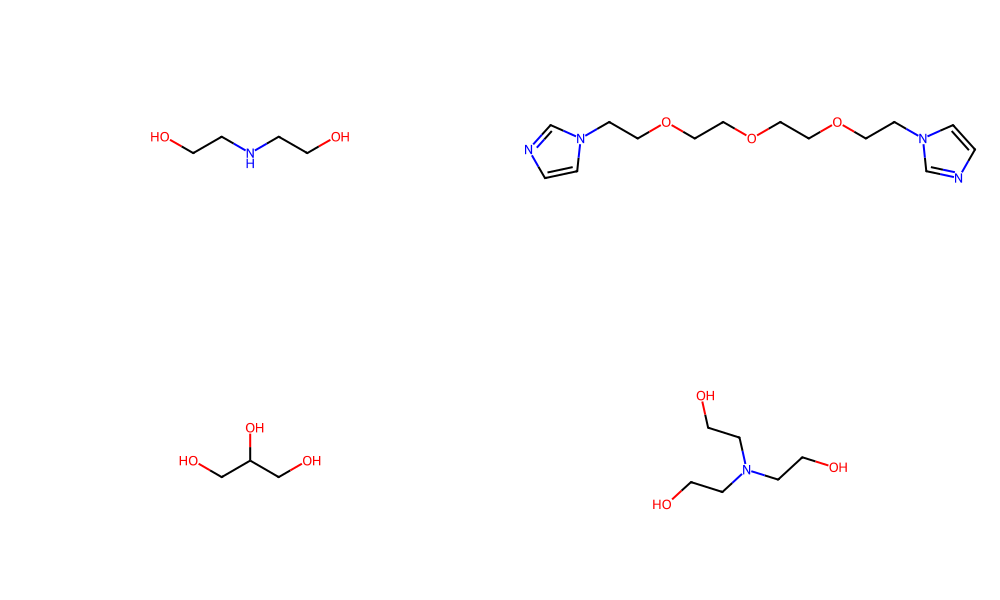

In [31]:
rdmols = [Chem.MolFromSmiles(x) for x in high_vis.smiles]
Draw.MolsToGridImage(rdmols, molsPerRow=2, subImgSize=(500, 300))